In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import plot_confusion_matrix, classification_report, matthews_corrcoef, accuracy_score, f1_score

In [ ]:
data = pd.read_csv("/content/ObesityDataSet_raw_and_data_sinthetic.csv")

In [ ]:
data

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [ ]:
data.isna().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [ ]:
print(data['family_history_with_overweight'].unique())
print(data['FAVC'].unique())
print(data['CAEC'].unique())
print(data['SMOKE'].unique())	
print(data['SCC'].unique())
print(data['CALC'].unique())
print(data['MTRANS'].unique())
print(data['NObeyesdad'].unique())

['yes' 'no']
['no' 'yes']
['Sometimes' 'Frequently' 'Always' 'no']
['no' 'yes']
['no' 'yes']
['no' 'Sometimes' 'Frequently' 'Always']
['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']
['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']


## So we have:
- 8 columns that are categorical including target column
- 3 are more than 2 types of records so we need to one-hot encode them (Only considering features)
- Rest 4 we can replace the categories into 0 and 1.

In [ ]:
data['NObeyesdad'].value_counts()

Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: NObeyesdad, dtype: int64

## Good distribution of data in the target column

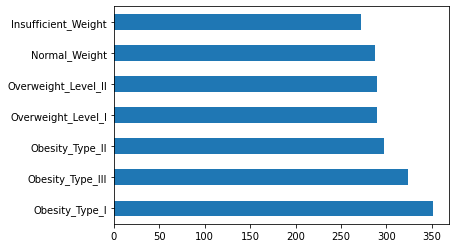

In [ ]:
data['NObeyesdad'].value_counts().plot(kind='barh')

## Multiclass Classification Problem

## Preparing the data

In [ ]:
# One hot encode function
def one_hot_encoding(df, column, rename=False):
  df = df.copy()
  if rename == True:
    df[column] = df[column].replace({x: i for i, x in enumerate(df[column].unique())})
  dummies = pd.get_dummies(df[column], prefix=column)
  df = pd.concat([df, dummies], axis=1)
  df = df.drop(column, axis=1)

  return df

In [ ]:
def preprocess_inputs(df):
  df = df.copy()

  #Replacing categorical column records with 0 and 1 (Only binary columns)
  df['Gender'] = df['Gender'].replace(['Male', 'Female'], [1,0])
  df['family_history_with_overweight'] = df['family_history_with_overweight'].replace(['yes', 'no'], [1,0])
  df['FAVC'] = df['FAVC'].replace(['yes', 'no'], [1,0])
  df['SMOKE'] = df['SMOKE'].replace(['yes', 'no'], [1,0])
  df['SCC'] = df['SCC'].replace(['yes', 'no'], [1,0])

  #One hot encode the 3 columns
  df = one_hot_encoding(df, column='CAEC', rename=False)
  df = one_hot_encoding(df, column='CALC', rename=False)
  df = one_hot_encoding(df, column='MTRANS', rename=False)

  # X and y
  X = df.drop("NObeyesdad", axis=1)
  y = df['NObeyesdad']

  #split
  X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, shuffle=True, random_state=21)
 
  return X_train, X_test, y_train, y_test

### Tree based models don't require scaled data so not scaling the data as we are going to use tree-based classifiers.

In [ ]:
 X_train, X_test, y_train, y_test = preprocess_inputs(data)

In [ ]:
X_train

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,SMOKE,CH2O,SCC,FAF,TUE,CAEC_Always,CAEC_Frequently,CAEC_Sometimes,CAEC_no,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
285,1,21.000000,1.790000,105.000000,1,1,2.000000,3.000000,0,1.000000,0,0.000000,0.000000,1,0,0,0,0,0,1,0,0,0,0,1,0
1737,1,25.659092,1.848420,117.631707,1,1,2.128574,3.000000,0,2.531984,0,1.003294,0.026575,0,0,1,0,0,0,1,0,0,0,0,1,0
1092,1,22.188810,1.717722,81.929910,1,1,2.000000,1.152521,0,1.723159,0,1.390160,1.094941,0,0,1,0,0,0,1,0,0,0,0,1,0
968,0,31.793937,1.650150,73.810728,1,1,2.372494,2.849848,0,1.028538,0,0.675983,0.303025,0,0,1,0,0,0,1,0,1,0,0,0,0
983,1,29.956198,1.703688,82.207978,1,1,2.119643,3.292956,0,1.723372,0,0.000000,0.987102,0,0,1,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1144,1,23.940030,1.721348,83.986714,1,1,2.407817,2.844138,0,1.983649,0,0.868721,0.089354,0,0,1,0,0,0,1,0,0,0,0,1,0
48,0,20.000000,1.660000,60.000000,1,0,3.000000,3.000000,0,2.000000,0,1.000000,0.000000,0,0,1,0,0,0,1,0,0,0,0,0,1
772,1,20.000000,1.831357,89.652557,1,1,2.555401,3.292386,0,3.000000,0,2.000000,0.315918,0,0,1,0,0,0,1,0,0,0,0,1,0
1848,0,25.897815,1.664463,102.781971,1,1,3.000000,3.000000,0,1.068493,0,0.112122,1.000000,0,0,1,0,0,0,1,0,0,0,0,1,0


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1688 entries, 285 to 1231
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          1688 non-null   int64  
 1   Age                             1688 non-null   float64
 2   Height                          1688 non-null   float64
 3   Weight                          1688 non-null   float64
 4   family_history_with_overweight  1688 non-null   int64  
 5   FAVC                            1688 non-null   int64  
 6   FCVC                            1688 non-null   float64
 7   NCP                             1688 non-null   float64
 8   SMOKE                           1688 non-null   int64  
 9   CH2O                            1688 non-null   float64
 10  SCC                             1688 non-null   int64  
 11  FAF                             1688 non-null   float64
 12  TUE                             

In [ ]:
y_train

285          Obesity_Type_I
1737        Obesity_Type_II
1092    Overweight_Level_II
968      Overweight_Level_I
983     Overweight_Level_II
               ...         
1144    Overweight_Level_II
48            Normal_Weight
772      Overweight_Level_I
1848       Obesity_Type_III
1231         Obesity_Type_I
Name: NObeyesdad, Length: 1688, dtype: object

In [ ]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

1688
423
1688
423


## Training the Model

In [ ]:
dtree = DecisionTreeClassifier()
dtree_clf = dtree.fit(X_train, y_train)

In [ ]:
random_forest = RandomForestClassifier()
random_forest_clf = random_forest.fit(X_train, y_train)

In [ ]:
xgboost = GradientBoostingClassifier()
xgboost_clf = xgboost.fit(X_train, y_train)

# Evaluation and Interpretibility

# Decision Tree

In [ ]:
#get predictions
y_train_pred = dtree_clf.predict(X_train)
y_test_pred = dtree_clf.predict(X_test)

#Training set performances
dtree_clf_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculating Accuracy
dtree_clf_train_mcc = matthews_corrcoef(y_train, y_train_pred) # Calculating MCC
dtree_clf_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculating F1-score

#Test set performances
dtree_clf_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculating Accuracy
dtree_clf_test_mcc = matthews_corrcoef(y_test, y_test_pred) # Calculating MCC
dtree_clf_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculating F1-score

print('Model performance for Training set')
print('- Accuracy: %s' % dtree_clf_train_accuracy)
print('- MCC: %s' % dtree_clf_train_mcc)
print('- F1 score: %s' % dtree_clf_train_f1)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % dtree_clf_test_accuracy)
print('- MCC: %s' % dtree_clf_test_mcc)
print('- F1 score: %s' % dtree_clf_test_f1)

Model performance for Training set
- Accuracy: 1.0
- MCC: 1.0
- F1 score: 1.0
----------------------------------
Model performance for Test set
- Accuracy: 0.9527186761229315
- MCC: 0.9447106461875341
- F1 score: 0.9527398704561981


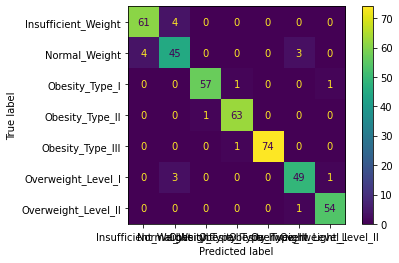

In [ ]:
plot_confusion_matrix(dtree_clf, X_test, y_test, labels = dtree_clf.classes_)

In [77]:
dtree_clr = classification_report(y_test, y_test_pred, labels=dtree_clf.classes_)
print(dtree_clr)

                     precision    recall  f1-score   support

Insufficient_Weight       0.94      0.94      0.94        65
      Normal_Weight       0.87      0.87      0.87        52
     Obesity_Type_I       0.98      0.97      0.97        59
    Obesity_Type_II       0.97      0.98      0.98        64
   Obesity_Type_III       1.00      0.99      0.99        75
 Overweight_Level_I       0.92      0.92      0.92        53
Overweight_Level_II       0.96      0.98      0.97        55

           accuracy                           0.95       423
          macro avg       0.95      0.95      0.95       423
       weighted avg       0.95      0.95      0.95       423



#### Feature importance

In [78]:
!pip install shap

     |████████████████████████████████| 358kB 5.3MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491621 sha256=56b375df86c8bdce57973ad9bf36b2b2d23086be9f061abec2c4d725bf393d78
  Stored in directory: /root/.cache/pip/wheels/15/27/f5/a8ab9da52fd159aae6477b5ede6eaaec69fd130fa0fa59f283
Successfully built shap


In [79]:
import shap

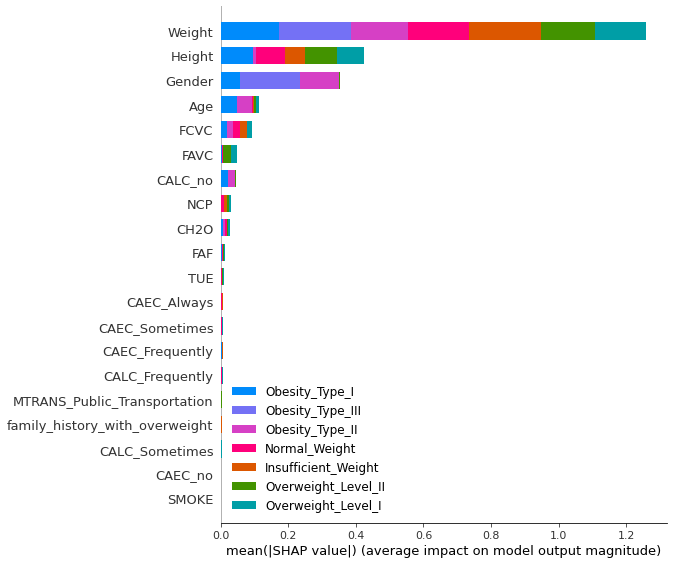

In [80]:
# Calculate Shap values
explainer_dtree = shap.TreeExplainer(dtree_clf)
shap_values_dtree = explainer_dtree.shap_values(X_test)
shap.initjs()
shap.summary_plot(shap_values_dtree, X_test, class_names=dtree_clf.classes_)

## We can see "Weight", "Height", "Gender", and Age are few of the columns that have more impact on the model performance.

## Drawing the Decision Tree plot.

In [81]:
from IPython.display import Image
from sklearn import tree
import pydotplus

In [82]:
X_train.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CAEC_Always', 'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no',
       'CALC_Always', 'CALC_Frequently', 'CALC_Sometimes', 'CALC_no',
       'MTRANS_Automobile', 'MTRANS_Bike', 'MTRANS_Motorbike',
       'MTRANS_Public_Transportation', 'MTRANS_Walking'],
      dtype='object')

In [83]:
dot_data = tree.export_graphviz(dtree_clf,
                                out_file=None,
                                feature_names=X_train.columns,
                                class_names=dtree_clf.classes_)

In [84]:
graph = pydotplus.graph_from_dot_data(dot_data)

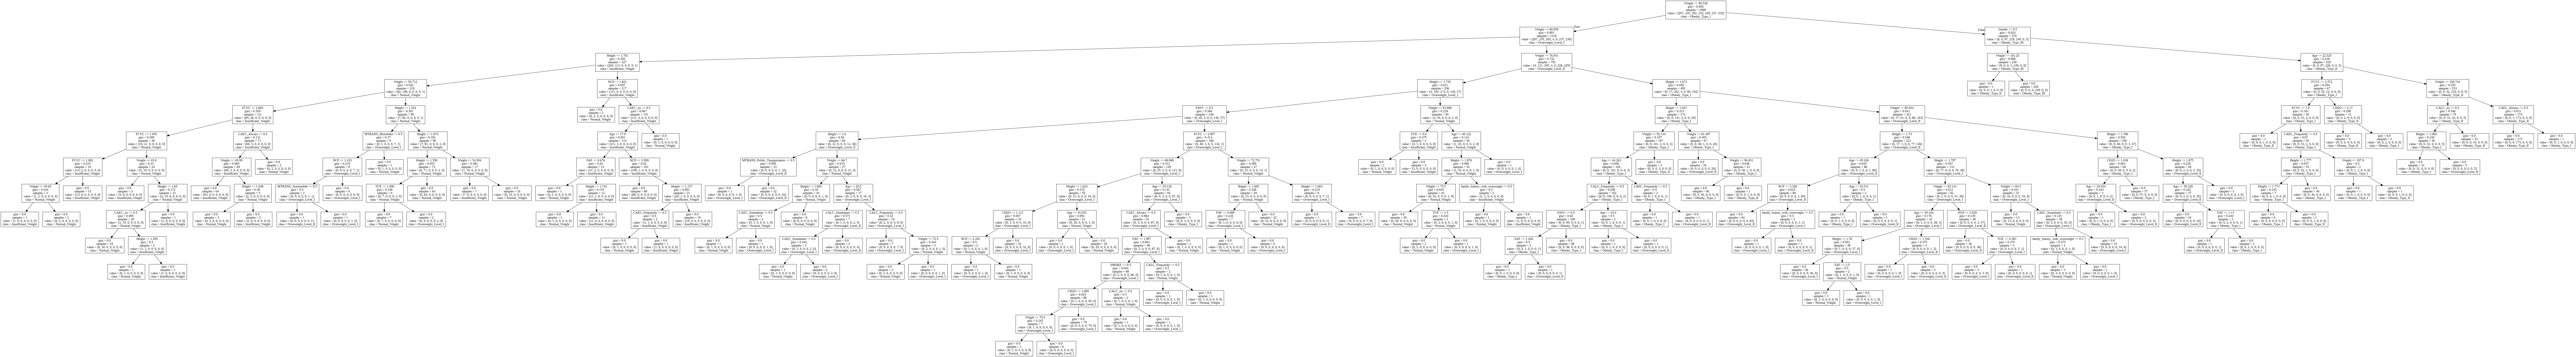

In [85]:
Image(graph.create_png())

In [86]:
#save the image
graph.write_png("decision_tree_plot.png")

True

# RANDOM FOREST (EVALUATION)

In [87]:
#get predictions
y_train_rf_pred = random_forest_clf.predict(X_train)
y_test_rf_pred = random_forest_clf.predict(X_test)

#Test set performances
random_forest_clf_test_accuracy = accuracy_score(y_test, y_test_rf_pred) # Calculating Accuracy
random_forest_clf_test_mcc = matthews_corrcoef(y_test, y_test_rf_pred) # Calculating MCC
random_forest_clf_test_f1 = f1_score(y_test, y_test_rf_pred, average='weighted') # Calculating F1-score

print('Model performance for Test set')
print('- Accuracy: %s' % random_forest_clf_test_accuracy)
print('- MCC: %s' % random_forest_clf_test_mcc)
print('- F1 score: %s' % random_forest_clf_test_f1)

Model performance for Test set
- Accuracy: 0.9598108747044918
- MCC: 0.9536810038379495
- F1 score: 0.9611980432428384


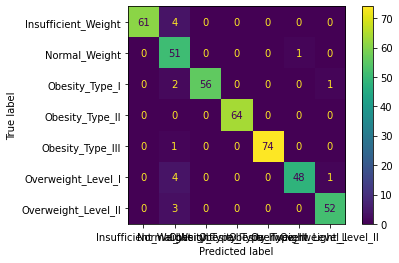

In [93]:
plot_confusion_matrix(random_forest_clf, X_test, y_test, labels=random_forest_clf.classes_)

In [94]:
rf_clr = classification_report(y_test, y_test_rf_pred, labels=random_forest_clf.classes_)
print(rf_clr)

                     precision    recall  f1-score   support

Insufficient_Weight       1.00      0.94      0.97        65
      Normal_Weight       0.78      0.98      0.87        52
     Obesity_Type_I       1.00      0.95      0.97        59
    Obesity_Type_II       1.00      1.00      1.00        64
   Obesity_Type_III       1.00      0.99      0.99        75
 Overweight_Level_I       0.98      0.91      0.94        53
Overweight_Level_II       0.96      0.95      0.95        55

           accuracy                           0.96       423
          macro avg       0.96      0.96      0.96       423
       weighted avg       0.97      0.96      0.96       423



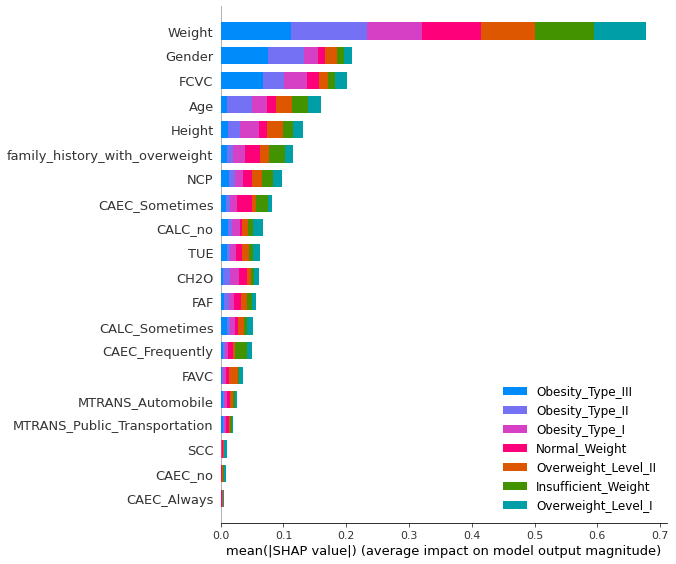

In [88]:
# Calculate Shap values
explainer_rf = shap.TreeExplainer(random_forest_clf)
shap_values_rf = explainer_rf.shap_values(X_test)
shap.initjs()
shap.summary_plot(shap_values_rf, X_test, class_names=random_forest_clf.classes_)

### FCVC is a important feature once random forest is in use. It was not the case in Decision Tree.

## XGBoost Evaluation

In [89]:
#get predictions
y_train_xg_pred = xgboost_clf.predict(X_train)
y_test_xg_pred = xgboost_clf.predict(X_test)

#Test set performances
xg_test_accuracy = accuracy_score(y_test, y_test_xg_pred) # Calculating Accuracy
xg_test_mcc = matthews_corrcoef(y_test, y_test_xg_pred) # Calculating MCC
xg_test_f1 = f1_score(y_test, y_test_xg_pred, average='weighted') # Calculating F1-score

print('Model performance for Test set')
print('- Accuracy: %s' % xg_test_accuracy)
print('- MCC: %s' % xg_test_mcc)
print('- F1 score: %s' % xg_test_f1)

Model performance for Test set
- Accuracy: 0.9810874704491725
- MCC: 0.9779261394344877
- F1 score: 0.981088797439153


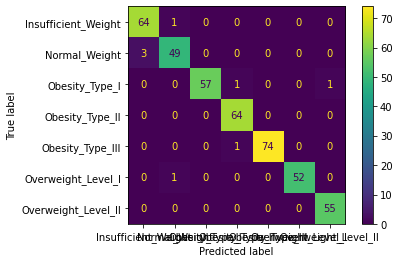

In [90]:
plot_confusion_matrix(xgboost_clf, X_test, y_test, labels=xgboost_clf.classes_)

In [91]:
xg_clr = classification_report(y_test, y_test_xg_pred, labels=xgboost_clf.classes_)
print(xg_clr)

                     precision    recall  f1-score   support

Insufficient_Weight       0.96      0.98      0.97        65
      Normal_Weight       0.96      0.94      0.95        52
     Obesity_Type_I       1.00      0.97      0.98        59
    Obesity_Type_II       0.97      1.00      0.98        64
   Obesity_Type_III       1.00      0.99      0.99        75
 Overweight_Level_I       1.00      0.98      0.99        53
Overweight_Level_II       0.98      1.00      0.99        55

           accuracy                           0.98       423
          macro avg       0.98      0.98      0.98       423
       weighted avg       0.98      0.98      0.98       423



# SHAP doesn't work for Gradient Boost when it is a multiclass problem. It only works for binary classification.

# Gradient Boost > Random Forest > Decision Tree

# Stacking Model

In [95]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

models_list = [
    ('dtree',dtree_clf),
    ('random_forest', random_forest_clf),
    ('xgboost', xgboost_clf)]

# Build stack model
stack_ml_model = StackingClassifier(
    estimators=models_list, final_estimator= GradientBoostingClassifier()
)

# Train stacked model
stack_ml_model.fit(X_train, y_train)

#making predictions on test_set
y_test_pred_stacked = stack_ml_model.predict(X_test)

# Test set model performance
stacked_model_test_accuracy = accuracy_score(y_test, y_test_pred_stacked) # Calculate Accuracy
stacked_model_test_mcc = matthews_corrcoef(y_test, y_test_pred_stacked) # Calculate MCC
stacked_model_test_f1 = f1_score(y_test, y_test_pred_stacked, average='weighted') # Calculate F1-score

print('Model performance of Stcaked Model for Test set')
print('- Accuracy: %s' % stacked_model_test_accuracy)
print('- MCC: %s' % stacked_model_test_mcc)
print('- F1 score: %s' % stacked_model_test_f1)

Model performance of Stcaked Model for Test set
- Accuracy: 0.9787234042553191
- MCC: 0.9751258424184035
- F1 score: 0.9787194171801422


# Saving the model

In [96]:
#using joblib
import joblib

In [97]:
model_file_tree = open("decision_tree_model.pkl", "wb")
joblib.dump(dtree_clf, model_file_tree)
model_file_tree.close()

In [98]:
model_file_rf = open("random_forest_model.pkl", "wb")
joblib.dump(random_forest_clf, model_file_rf)
model_file_rf.close()

In [99]:
model_file_xg = open("xgboost_model.pkl", "wb")
joblib.dump(xgboost_clf, model_file_xg)
model_file_xg.close()

## Using Sklearn's Pipeline

In [100]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [101]:
def pipeline_data(df):
  df = df.copy()

  #Replacing categorical column records with 0 and 1 (Only binary columns)
  df['Gender'] = df['Gender'].replace(['Male', 'Female'], [1,0])
  df['family_history_with_overweight'] = df['family_history_with_overweight'].replace(['yes', 'no'], [1,0])
  df['FAVC'] = df['FAVC'].replace(['yes', 'no'], [1,0])
  df['SMOKE'] = df['SMOKE'].replace(['yes', 'no'], [1,0])
  df['SCC'] = df['SCC'].replace(['yes', 'no'], [1,0])

  #X and y
  X = df.drop("NObeyesdad", axis=1)
  y = df['NObeyesdad']

  #split
  
  X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, shuffle=True, random_state=21)
 
  return X_train, X_test, y_train, y_test

In [102]:
X_train, X_test, y_train, y_test = pipeline_data(data)

In [103]:
X_train

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
285,1,21.000000,1.790000,105.000000,1,1,2.000000,3.000000,Always,0,1.000000,0,0.000000,0.000000,Sometimes,Public_Transportation
1737,1,25.659092,1.848420,117.631707,1,1,2.128574,3.000000,Sometimes,0,2.531984,0,1.003294,0.026575,Sometimes,Public_Transportation
1092,1,22.188810,1.717722,81.929910,1,1,2.000000,1.152521,Sometimes,0,1.723159,0,1.390160,1.094941,Sometimes,Public_Transportation
968,0,31.793937,1.650150,73.810728,1,1,2.372494,2.849848,Sometimes,0,1.028538,0,0.675983,0.303025,Sometimes,Automobile
983,1,29.956198,1.703688,82.207978,1,1,2.119643,3.292956,Sometimes,0,1.723372,0,0.000000,0.987102,Sometimes,Automobile
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1144,1,23.940030,1.721348,83.986714,1,1,2.407817,2.844138,Sometimes,0,1.983649,0,0.868721,0.089354,Sometimes,Public_Transportation
48,0,20.000000,1.660000,60.000000,1,0,3.000000,3.000000,Sometimes,0,2.000000,0,1.000000,0.000000,Sometimes,Walking
772,1,20.000000,1.831357,89.652557,1,1,2.555401,3.292386,Sometimes,0,3.000000,0,2.000000,0.315918,Sometimes,Public_Transportation
1848,0,25.897815,1.664463,102.781971,1,1,3.000000,3.000000,Sometimes,0,1.068493,0,0.112122,1.000000,Sometimes,Public_Transportation


In [104]:
y_train

285          Obesity_Type_I
1737        Obesity_Type_II
1092    Overweight_Level_II
968      Overweight_Level_I
983     Overweight_Level_II
               ...         
1144    Overweight_Level_II
48            Normal_Weight
772      Overweight_Level_I
1848       Obesity_Type_III
1231         Obesity_Type_I
Name: NObeyesdad, Length: 1688, dtype: object

# Pipeline

In [105]:
categorical_transformer = Pipeline(steps=[
                                          ('onehot', OneHotEncoder(sparse=False))
])

column_transformer = ColumnTransformer(transformers=[
                                                     ('categorical', categorical_transformer,
                                                      ['CAEC', 'CALC', 'MTRANS'])
], remainder='passthrough')

model = Pipeline(steps=[
                        ('column', column_transformer),
                        ('classifier', GradientBoostingClassifier())
])

In [106]:
model.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('column',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('categorical',
                                                  Pipeline(memory=None,
                                                           steps=[('onehot',
                                                                   OneHotEncoder(categories='auto',
                                                                                 drop=None,
                                                                                 dtype=<class 'numpy.float64'>,
                                                                                 handle_unknown='error',
                                                                                 sparse=False))],
                                       

# Evaluation

In [110]:
score = model.score(X_test, y_test)
print("Model score is:", np.round(score*100), "%")

Model score is: 98.0 %


In [111]:
y_pred_pipeline = model.predict(X_test)
print(y_pred_pipeline)

['Obesity_Type_III' 'Obesity_Type_I' 'Overweight_Level_I'
 'Overweight_Level_I' 'Obesity_Type_III' 'Insufficient_Weight'
 'Overweight_Level_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Normal_Weight' 'Overweight_Level_I' 'Obesity_Type_II' 'Obesity_Type_III'
 'Overweight_Level_II' 'Obesity_Type_II' 'Obesity_Type_II'
 'Overweight_Level_II' 'Obesity_Type_II' 'Overweight_Level_I'
 'Obesity_Type_I' 'Normal_Weight' 'Insufficient_Weight' 'Obesity_Type_I'
 'Normal_Weight' 'Obesity_Type_II' 'Overweight_Level_II' 'Obesity_Type_I'
 'Obesity_Type_I' 'Obesity_Type_III' 'Insufficient_Weight'
 'Overweight_Level_II' 'Obesity_Type_II' 'Obesity_Type_I'
 'Obesity_Type_II' 'Obesity_Type_II' 'Obesity_Type_I' 'Obesity_Type_III'
 'Insufficient_Weight' 'Overweight_Level_I' 'Obesity_Type_II'
 'Obesity_Type_III' 'Overweight_Level_II' 'Obesity_Type_III'
 'Normal_Weight' 'Normal_Weight' 'Insufficient_Weight' 'Obesity_Type_II'
 'Normal_Weight' 'Overweight_Level_II' 'Obesity_Type_III'
 'Obesity_Type_III' 'Obesity_T

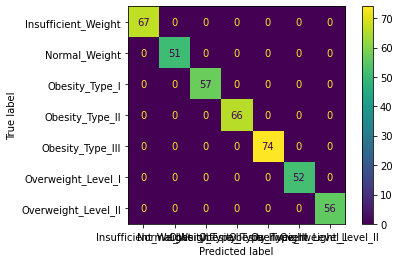

In [112]:
plot_confusion_matrix(model, X_test, y_pred_pipeline, labels= model.classes_)

In [113]:
pipeline_clr = classification_report(y_test, y_pred_pipeline, labels=model.classes_)
print(pipeline_clr)

                     precision    recall  f1-score   support

Insufficient_Weight       0.96      0.98      0.97        65
      Normal_Weight       0.96      0.94      0.95        52
     Obesity_Type_I       1.00      0.97      0.98        59
    Obesity_Type_II       0.97      1.00      0.98        64
   Obesity_Type_III       1.00      0.99      0.99        75
 Overweight_Level_I       1.00      0.98      0.99        53
Overweight_Level_II       0.98      1.00      0.99        55

           accuracy                           0.98       423
          macro avg       0.98      0.98      0.98       423
       weighted avg       0.98      0.98      0.98       423

